<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i> Practica 8 </i></h1>
  </font>
  <h3 align="center"><i>  </i></h3>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h4 align="center"><i> Bases de datos estructuradas</i></h5>
  <h5 align="center"><i>Autores: Mosqueda García Raul Isaid 315096574</i></h5>
  <h5 align="center"><i>  Ruiz Puga Ingrid Pamela 314012926</i></h5>
  <h5 align="center"><i>  Veleros Vega Luis Alfonso 314271646</i></h5>
 </font>

---

Para esta practica se operara con los csv descargados de la base de datos del servidor. 

#1. 
Se desea saber con base en la información de los clientes que han pedido préstamo personal. Quienes son
los más adecuados para promocionarles algún préstamo hipotecario. Generar grafica o reporte que permita saber el
patrón de manejo de cuenta (por ejemplo) y clasificarlo/agruparlo como buen prospecto para préstamo hipotecario.
¿Qué puede concluir, recomendar o decisión tomar a partir de esta información?

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=ad866425cd4327576ad17dc8b6ac2eadc8cb867c28ceb53b068b95fc2e7cc59a
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import plotnine as p9
import datetime
from sklearn import linear_model

In [ ]:
hechos=pd.read_csv('hechos_estrella.csv')
cliente=pd.read_csv('cliente.csv')
producto=pd.read_csv('producto.csv')
tiempo=pd.read_csv('tiempo.csv')

En primera instancia vamos a descartar a las personas que ya tienen hipoteca. Pues dado que ya tienen una deuda buscaremos que la cubran para poder ofrecerles otro prestamo hipotecario

In [ ]:
q1="""SELECT cliente.cliente_id, cliente.nombre_cliente, cliente.ingreso,
producto.tipo_producto_desc,producto.producto_id,producto.producto_desc,
tiempo.fecha, hechos.saldo_$ as saldo,producto.numero_cuenta
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc != "Mortgage"
"""
data = ps.sqldf(q1,locals())

In [ ]:
#Cambiamos el tipo de dato a fecha para operar con esta columna.
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')
data.sort_values(by='fecha')
#data.index = data['fecha']


,cliente_id,nombre_cliente,ingreso,tipo_producto_desc,producto_id,producto_desc,fecha,saldo,numero_cuenta
0,3001,Anderson,83770,Checking,401,Regular Checking,2018-01-31,15000,57750
72,3540,Rivera,79698,Checking,405,Checking for Children,2018-01-31,500,41862
120,3538,Redfern,35891,Personal Loan,416,90 Day Secured Loan,2018-01-31,10000,17719
123,3540,Rivera,79698,Personal Loan,417,Line of Credit,2018-01-31,100000,43670
147,3539,Richards,115961,Personal Loan,417,Line of Credit,2018-01-31,125000,51040
...,...,...,...,...,...,...,...,...,...
95,3540,Rivera,79698,Checking,405,Checking for Children,2019-12-31,950,41862
47,3001,Anderson,83770,Checking,402,Checking w. Interest,2019-12-31,23900,94069
119,3002,Antoni,102996,Saving,406,Regular Saving,2019-12-31,35500,22420
71,3002,Antoni,102996,Checking,404,On Line Checking,2019-12-31,19500,33966


Dado que ya sabemos las personas que tienen prestamos hipotecarios, veremos el comportamiento de los saldos de las personas que aun son candidatas para ofrecerles un prestamo

In [ ]:
q2="""SELECT cliente.cliente_id, cliente.nombre_cliente, cliente.ingreso,
producto.tipo_producto_desc,producto.producto_id,producto.producto_desc,
tiempo.fecha, hechos.saldo_$ as saldo,producto.numero_cuenta
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE nombre_cliente != "Redfern" AND nombre_cliente != "Richards" 
"""
datash = ps.sqldf(q2,locals())
datash

In [ ]:
#Cambiamos el tipo de dato a fecha para operar con esta columna.
datash['fecha'] = pd.to_datetime(datash['fecha'], format='%d/%m/%Y')
datash.sort_values(by='fecha')
datash.index = datash['fecha']
#datash.resample("M").sum()

La grafica muestra que Anderson, Antoni y Rivera son las personas que son factibles al prestamo, pero podemos ver mucha variación en sus saldos (los picos) debido a que esos saldos pueden venir de distintas cuentas. Por lo que veremos con mas detalle como se comportan para los presuntos candidatos.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


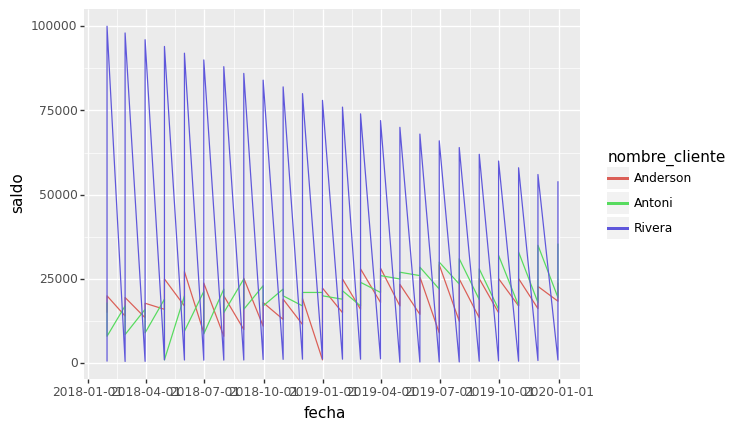

<ggplot: (8782355548336)>

In [ ]:
(p9.ggplot(data= datash,
           mapping=p9.aes(x='fecha',
                          y='saldo',
                          color='nombre_cliente'))
    + p9.geom_line()
)

Veamos por candidato

In [ ]:
q3="""SELECT tiempo.fecha, hechos.saldo_$ as saldo, producto.producto_desc
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc != "Mortgage" AND cliente.nombre_cliente =="Rivera"
"""

q4="""SELECT tiempo.fecha, hechos.saldo_$ as saldo, producto.producto_desc
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc != "Mortgage" AND cliente.nombre_cliente =="Antoni"
"""

q5="""SELECT tiempo.fecha, hechos.saldo_$ as saldo, producto.producto_desc
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc != "Mortgage" AND cliente.nombre_cliente =="Anderson"
"""
Rivera = ps.sqldf(q3,locals())
Antoni = ps.sqldf(q4,locals())
Anderson = ps.sqldf(q5,locals())

In [ ]:
#Cambiamos el tipo de dato a fecha para operar con esta columna.
Rivera['fecha'] = pd.to_datetime(Rivera['fecha'], format='%d/%m/%Y')
Rivera.sort_values(by='fecha')
Rivera.index = Rivera['fecha']
#Antoni.resample("M").sum()

Antoni['fecha'] = pd.to_datetime(Antoni['fecha'], format='%d/%m/%Y')
Antoni.sort_values(by='fecha')
Antoni.index = Antoni['fecha']
#Antoni.resample("M").sum()

Anderson['fecha'] = pd.to_datetime(Anderson['fecha'], format='%d/%m/%Y')
Anderson.sort_values(by='fecha')
Anderson.index = Anderson['fecha']
#Antoni.resample("M").sum()

Rivera tiene dos cuentas, la de cheking of children y Line of credit. El saldo en su linea de credito ha ido disminuyendo considerablemente por lo que podriamos pensar que ha estado consumiento (utilizando su linea de credito) y tiene esas deudas con el banco, por lo que posiblemente no seria en candidato ideal.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


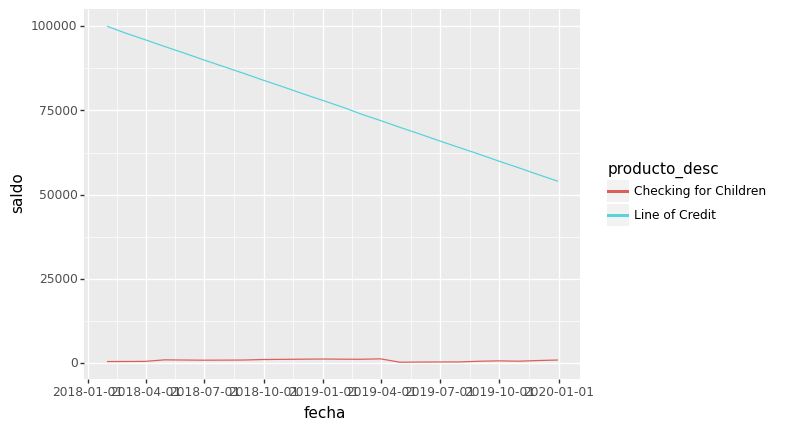

<ggplot: (8782355453921)>

In [ ]:
(p9.ggplot(data= Rivera,
           mapping=p9.aes(x='fecha',
                          y='saldo',
                          color='producto_desc'))
    + p9.geom_line()
)

Anderson también tiene dos cuenras, la de checking interest y regular checking, en ambas cuentas podemos ver que tiene una tendencia creciente. Aparte que en este caso Anderson tiene cuentas donde el dinero no es credito sino propio, por lo tanto Anderson es un buen candidato para ofrecerle el prestamo hipotecario.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


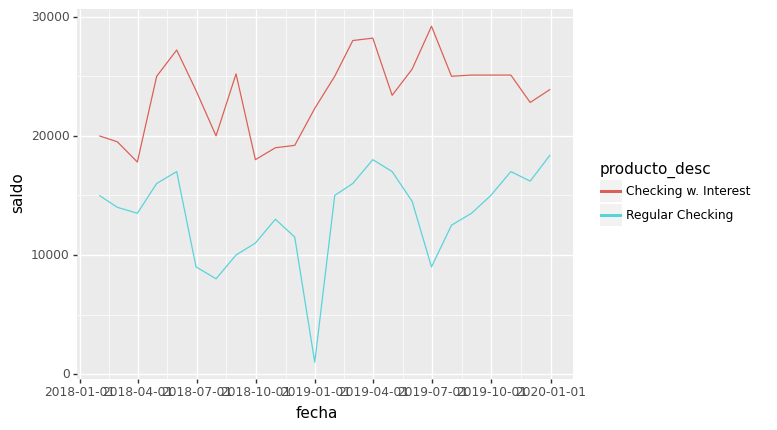

<ggplot: (-9223363254499231772)>

In [ ]:
(p9.ggplot(data= Anderson,
           mapping=p9.aes(x='fecha',
                          y='saldo',
                          color='producto_desc'))
    + p9.geom_line()
)

An igual que Andeson, Antoni tiene dos cuentas una de On Line cheking y otra de Regular checking, de aquí podemos observar que la tendencia es creciente. Pero sobre todo la cuenta de Regular Saving tiende a crecer muy rapidamente por lo que tambien es un prospecto con potenciales recursos para cumplir con su deuda.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


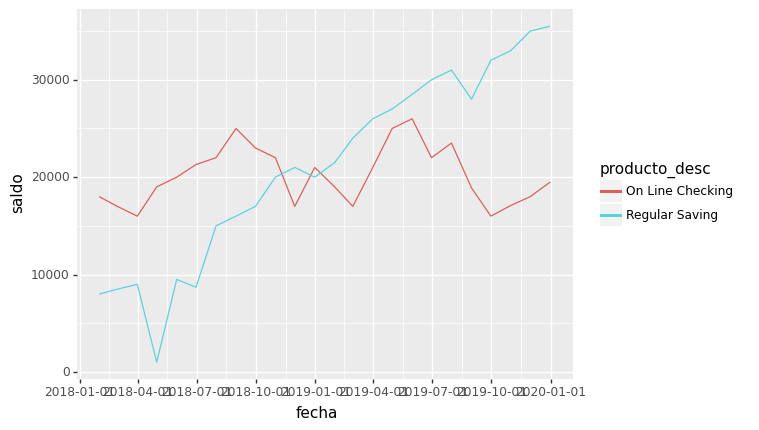

<ggplot: (8782355387603)>

In [ ]:
(p9.ggplot(data= Antoni,
           mapping=p9.aes(x='fecha',
                          y='saldo',
                          color='producto_desc'))
    + p9.geom_line()
)

#2. 
Se desea saber cuáles son las características de los clientes que por lo regular no terminan de pagar su préstamo hipotecario. ¿Qué puede concluir, recomendar o decisión tomar a partir de esta información?

In [ ]:
q5="""SELECT cliente.cliente_id, cliente.nombre_cliente, cliente.ingreso,
producto.tipo_producto_desc,producto.producto_id,producto.producto_desc,
tiempo.fecha, hechos.saldo_$ as saldo,producto.numero_cuenta
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc == "Mortgage"
"""
hipoteca = ps.sqldf(q5,locals())
hipoteca

Tomando solo los clientes que cuentan con un prestamo hipotecario veamos que ambos han pagado con distinta velocidad y aún tienen la deuda.

In [ ]:
hipoteca['fecha'] = pd.to_datetime(hipoteca['fecha'], format='%d/%m/%Y')
hipoteca.sort_values(by='fecha')
hipoteca.index = hipoteca['fecha']

Redfern y Richards tienen su prestamo vigente con la diferencia y Richard ha pagado montos mayores en los ultimos meses pero ambos a;un deben al banco. Cabe notar que el prestamo de Richard fue mucho mayor al de Redfern

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


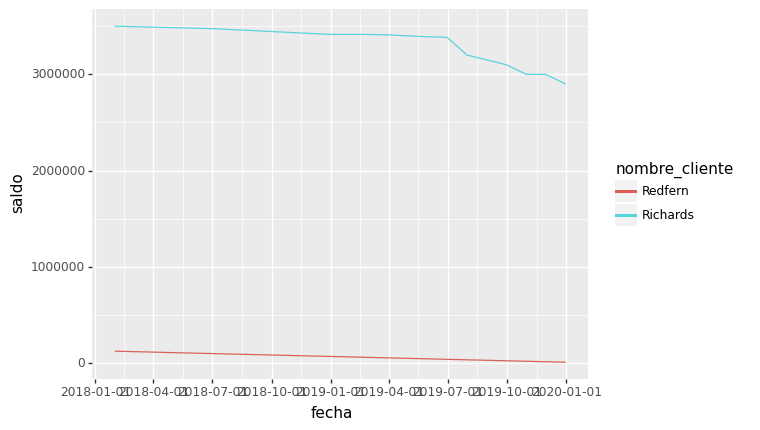

<ggplot: (-9223363254499459086)>

In [ ]:
(p9.ggplot(data= hipoteca,
           mapping=p9.aes(x='fecha',
                          y='saldo',
                          color='nombre_cliente'))
    + p9.geom_line()
)

Entre las pocas características que se pueden observar de los clientes con deuda hipotecaria es que tienen edad de 60 + por lo que se puede recomentar al banco que procure otorgar estos prestamos a personas un poco más jovenes con mayor solvencia. Podria ser con un monto de ingresos elevado por ejemplo.

In [ ]:
q6="""SELECT cliente.nombre_cliente,
cliente.edad, 
cliente.ingreso,
cliente.estadocivil
FROM hechos
JOIN cliente ON cliente.llave_cliente == hechos.llave_cliente
JOIN producto ON producto.llave_producto == hechos.llave_producto
JOIN tiempo ON tiempo.llave_tiempo == hechos.llave_tiempo
WHERE producto.tipo_producto_desc == "Mortgage"
GROUP BY  cliente.nombre_cliente
"""
caracteristicas = ps.sqldf(q6,locals())
caracteristicas

,nombre_cliente,edad,ingreso,estadocivil
0,Redfern,63,35891,Single
1,Richards,68,115961,Married


#3
Se desea saber con base a la edad del cliente, el tipo de prestamo y su desempeño de pagos, la fecha aproximada de termino de pago de dicho prestamo. 


In [ ]:
#Cargar los datos 
facts = pd.read_csv('/content/hechos_estrella.csv')
clients = pd.read_csv('/content/cliente.csv')
product = pd.read_csv('/content/producto.csv')
time = pd.read_csv('/content/tiempo.csv')

Para esto, primero generamos una tabla donde se tengan las fechas de nacimiento de los clientes, sus prestamos y sus saldos.

In [ ]:
#Guardamos en una tabla el dataframe correspondiente a las fechas de nacimiento de los clientes, sus prestamos y sus saldos. 
q1="""SELECT 
nombre_cliente, edad, producto_desc,saldo_$,fecha
FROM
clients, facts, product, time
WHERE
facts.llave_cliente = clients.llave_cliente 
AND
tipo_producto_desc = 'Mortgage'
AND
facts.llave_producto = product.llave_producto
AND
facts.llave_tiempo = time.llave_tiempo;"""
data = ps.sqldf(q1,locals())
data

,nombre_cliente,edad,producto_desc,saldo_$,fecha
0,Richards,68,15 Year Mortgage,3500000,31/01/2018
1,Richards,68,15 Year Mortgage,3495000,28/02/2018
2,Richards,68,15 Year Mortgage,3490000,31/03/2018
3,Richards,68,15 Year Mortgage,3485000,30/04/2018
4,Richards,68,15 Year Mortgage,3480000,31/05/2018
5,Richards,68,15 Year Mortgage,3475000,30/06/2018
6,Richards,68,15 Year Mortgage,3465000,31/07/2018
7,Richards,68,15 Year Mortgage,3455000,31/08/2018
8,Richards,68,15 Year Mortgage,3445000,30/09/2018
9,Richards,68,15 Year Mortgage,3435000,31/10/2018


Con esta informacion, la forma dwe realizar las predicciones es ajustando un modelo de regresion lineal. Por la forma en la que se tienen los datos, se busca entonces predecir la fecha de los siguientes pagos hasta que el saldo sea 0. 

El modelo de regresion consiste en predecir la variable de tiempo con la variable de saldo como explicativa, para un tipo de hipoteca de un tipo de usuario dado.

Este modelo ajusta una recta para los saldos y fechas realizados hasta la edad determinada, y proyecta sobre esta los saldos hasta que se llegue a 0, y regresa la fecha de cuando el saldo sea 0.

In [ ]:
#Teniendo la informacion que se requiere, se toma una funcion donde se toma el cliente
def predict_time_last_payment(name,age,mortgage,data = data):
  #Excepciones
  if name not in set(data['nombre_cliente']): raise Exception ('La persona %s no es cliente con hipoteca'%name)
  if mortgage not in set(data['producto_desc']): raise Exception ('Actualmente no se tienen cuentas con la hipoteca %s'%mortgage)

  data_ = data[data['producto_desc']==mortgage]
  data_ = data[data['nombre_cliente']==name]
  data_ = data_[data['edad'] <= age]
  data_['fecha']=pd.to_datetime(data_['fecha'], format='%d/%m/%Y')
  
  x = np.array(data_['saldo_$']).reshape((-1, 1))
  y = list(data_['fecha'].apply(lambda x: x.toordinal()))
  regr = linear_model.LinearRegression()
  regr.fit(x, y)

  x_new = np.arange(x[-1],0,-100).reshape((-1, 1))
  y_pred = regr.predict(x_new)

  for i in range(len(y)):
    y[i] = datetime.date.fromordinal(y[i])

  plt.plot(y,x,'.')
  plt.plot(y_pred,x_new,'.')
  plt.xlabel('Tiempo')
  plt.ylabel('Saldo')
  plt.xticks(rotation=45)
  plt.title('Proyeccion de deuda del cliente %s'%name)
  plt.show()
  last_paymet = datetime.date.fromordinal(int(y_pred[-1]))
  print("El ultimo pago de %s sera el:%s"%(name,last_paymet))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


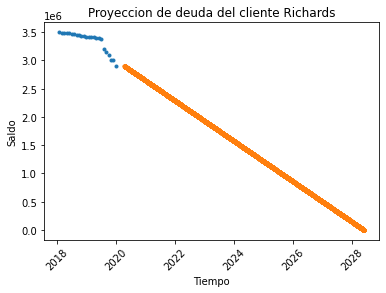

El ultimo pago de Richards sera el:2028-05-21


In [ ]:
predict_time_last_payment('Richards',68,'15 Year Mortgage')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


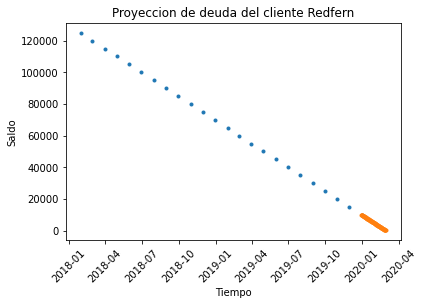

El ultimo pago de Redfern sera el:2020-02-28


In [ ]:
predict_time_last_payment('Redfern',63,'Second Home Mortgage')

Con las cuentas disponbles actualmente, se puede ver que la frecuencia de los pagos y su magnitud impacta de manera significante la proyeccion de los proccimos, donde si los pagos no son constentes en cantidad o frecuencia, se puede esperar un largo periodo de pago, mientras que si los pagos son frecuentes en monto o frecuencia, el modelo predice que su terminacion de pagos sera mucho mas proxima.

La forma de obtener inrgesos con estos pagos es incluir penalicaciones (que se volveran ingresos para la reserva de riesgos y de ser cubiertos, ingresos para el banco) donde se aplicaran estas penalizaciones en caso de realizare los pagos con retraso, la 'bonificacion' para las personas que paguen a tiempo sera no realizarles la penalizacion. 

##4
Se desea saber cuales son los productos que menor actividad(interes por parte de los clientes) ha tenido. De tal forma que se pueda pensar en eliminar dicho producto del portafolio de serivicios/productos del banco.

Para esta consulta, primero crearemos la tabla que contenga las frecuencias de los tipos de productos. 

In [ ]:
#Guardamos en una tabla el dataframe correspondiente a las frecuencias de los tipos de productos. 
q1="""SELECT 
producto_desc AS product, COUNT(Saldo_$) AS frequency
FROM
facts, product
WHERE
facts.llave_producto = product.llave_producto
GROUP BY 1
ORDER BY 2 ASC;"""
data = ps.sqldf(q1,locals())
data

,product,frequency
0,90 Day Secured Loan,3
1,15 Year Mortgage,24
2,Checking for Children,24
3,Checking w. Interest,24
4,On Line Checking,24
5,Regular Checking,24
6,Regular Saving,24
7,Second Home Mortgage,24
8,Line of Credit,48


Teniendo las frecuencias simplemente se ordenan los datos por frecuencias y se propone el $1/4$ mas bajo de estos productos para ser eliminado o remplazado. 

In [ ]:
def products_to_pop(data=data):
  op_data = data.sort_values(by='frequency',ascending=True)
  ordered_products = list(op_data['product'])
  size_top_pop = len(ordered_products) // 4
  underwhelming_products = ordered_products[:size_top_pop+1]
  not_underwhelming_products = ordered_products[size_top_pop+1:]
  print('The products that are more ignored by clients are:',underwhelming_products)
  print('The products that should be kept are:',not_underwhelming_products)

In [ ]:
products_to_pop()

The products that are more ignored by clients are: ['90 Day Secured Loan', '15 Year Mortgage', 'Checking for Children']
The products that should be kept are: ['Checking w. Interest', 'On Line Checking', 'Regular Checking', 'Regular Saving', 'Second Home Mortgage', 'Line of Credit']


En este caso debido a que casi todos los productos tienen las mismas frecuencias, gran parte del $1/4$ mas bajo es arbitrario pues se toma valores que comparten frecuencias con el resto. Para esto, el unico producto que se consideraria remplazar es el prestamo a 90 dias. Debido a la baja cantidad de prestamos realizados, si se desea mantener el producto, se pueden proponer promociones que incrementen el incentivo a los clientes por consumirlo, sin embargo una opcion que puede presentar mas ganancias para los bancos es realizar un producto similar al que tenga mas frecuencia, en este caso la aprtura de lineas de credito. 

Una forma de realizar este remplaso es hacer una linea de credito similar pero con distintas promociones encfocadas a otro tipo de clientes, de forma que se tengan los mismos rendimientos que la linea de credito que se tiene actualmente.

## 5. Se desea saber cual es la sucursal que menos actividad ha tenido (pocas aperturas de cuentas , pocos cllientes , pocos pagos , ahorros)

carguemos los datos necesarios para las consultas , dado que estamos hablando de sucursales y hechos

In [ ]:
!pip install pandasql

In [ ]:
import numpy as np 
import pandas as pd 
import pandasql as ps

In [ ]:
hechos = pd.read_csv('hechos_estrella.csv')
sucursal=pd.read_csv('sucursal.csv')
producto=pd.read_csv('producto.csv')

cambiamos el valor de 'saldo_$' con 'saldo' para su uso optimo

In [ ]:
hechos2=hechos.rename(columns={'saldo_$':'saldo'})

ya con el cambio

In [ ]:
hechos2.head()

,llave_org,llave_geografia,llave_cliente,llave_producto,llave_tiempo,saldo
0,1001,200001,300001,40001,50026,14000
1,1001,200001,300001,40028,50026,19500
2,1003,200283,300538,40432,50026,7000
3,1002,200006,300002,40136,50026,8500
4,1003,200283,300538,40366,50026,120000


In [ ]:
sucursal.head()

,llave_org,id_sucursal,nombre_suc
0,1001,101,Suc_Birmingham
1,1002,102,Suc_Phoenix
2,1003,103,Suc_Des Moines
3,1004,104,Suc_North Platte
4,1005,105,Suc_Lexington


In [ ]:
producto.head()

,llave_producto,tipo_producto_id,tipo_producto_desc,producto_id,producto_desc,numero_cuenta,tasa_interes,saldo_minimo
0,40001,4001,Checking,401,Regular Checking,57750,0.04,1000
1,40002,4001,Checking,401,Regular Checking,18858,0.04,1000
2,40003,4001,Checking,401,Regular Checking,88840,0.04,1000
3,40004,4001,Checking,401,Regular Checking,49239,0.04,1000
4,40005,4001,Checking,401,Regular Checking,23774,0.04,1000


veamos las suma de los saldos . En la sucursal con id 1004 (Suc_North Platte) vemos que es la que tiene mas saldo es decir mas operacion activas en cambio la sucursal con 1001 (Suc_Birmingham) vemos que tiene la menor cantidad de cuentas activas . centremonos en ello y en la comparacion con laguna de sus sucursales vecinas

In [ ]:
q2=""" select llave_org ,sum(saldo) as saldo
from hechos2
join producto ON producto.llave_producto == hechos2.llave_producto
group by llave_org
"""
sucursal_t=ps.sqldf(q2,locals())
sucursal_t

,llave_org,saldo
0,1001,884500
1,1002,989500
2,1003,1637000
3,1004,81949500
4,1005,1867705


estos son los datos de la sucursal con numeros mas bajos

In [ ]:
t1=""" select llave_org ,saldo,tipo_producto_id
from hechos2
join producto ON producto.llave_producto == hechos2.llave_producto
where llave_org ==1001

"""
sucursalpobre=ps.sqldf(t1,locals())
sucursalpobre

,llave_org,saldo,tipo_producto_id
0,1001,14000,4001
1,1001,19500,4001
2,1001,16000,4001
3,1001,28000,4001
4,1001,16000,4001
5,1001,25000,4001
6,1001,23400,4001
7,1001,17000,4001
8,1001,9000,4001
9,1001,23800,4001


sucursal con numeros altos

In [ ]:
t6=""" select llave_org,saldo,tipo_producto_id
from hechos2
join producto ON producto.llave_producto == hechos2.llave_producto
where llave_org ==1003

"""
sucursalneutra=ps.sqldf(t6,locals())
sucursalneutra

,llave_org,saldo,tipo_producto_id
0,1003,7000,4004
1,1003,120000,4003
2,1003,60000,4003
3,1003,110000,4003
4,1003,50000,4003
5,1003,100000,4003
6,1003,40000,4003
7,1003,85000,4003
8,1003,25000,4003
9,1003,75000,4003


numeros de sucursal 'promedio'

In [ ]:
t2=""" select llave_org,saldo,tipo_producto_id
from hechos2
join producto ON producto.llave_producto == hechos2.llave_producto
where llave_org ==1004

"""
sucursalbuena=ps.sqldf(t2,locals())
sucursalbuena

,llave_org,saldo,tipo_producto_id
0,1004,120000,4004
1,1004,3495000,4003
2,1004,3414500,4003
3,1004,60000,4004
4,1004,110000,4004
5,1004,3485000,4003
6,1004,3400000,4003
7,1004,50000,4004
8,1004,100000,4004
9,1004,3475000,4003


In [ ]:
from matplotlib import pylab as plt 
plt.rcParams['figure.figsize']=(10,9)
plt.style.use('ggplot')

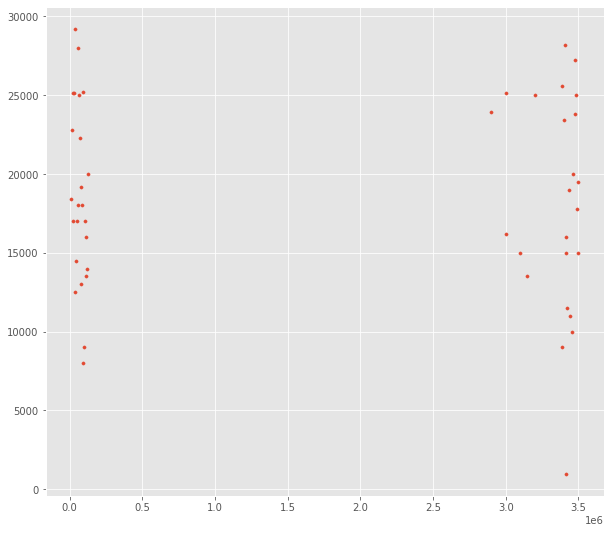

In [ ]:
#esta grafica mostrara los datos de la sucursal con mejores numeros vs la que menos tiene
f2= sucursalpobre.saldo.values
f1= sucursalbuena.saldo.values
f3=sucursalneutra.saldo.values
plt.scatter(f1,f2,s=10)


como se puede ver en la sucursal con mjeores numeros los puntos estan mas juntos (mas proximos entre si  ) en comparacion con la que menos tiene .
Para observar esto realizaremos el algorimto de k-medias para verlo mejor

In [ ]:
from sklearn.cluster import KMeans
X = np.array(list(zip(f1,f2)))
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
y=kmeans.predict(X)
C_ = kmeans.cluster_centers_
C_

array([[3347062.5       ,   18195.83333333],
       [  67500.        ,   18658.33333333]])

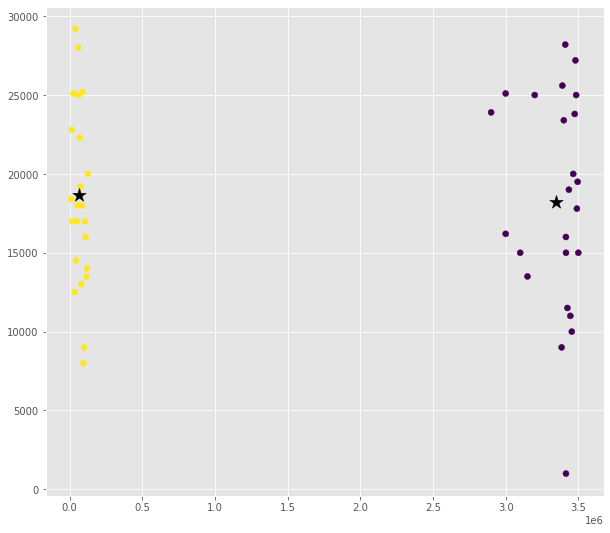

In [ ]:
fig , ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y)
ax.scatter(C_[:,0],C_[:,1],marker='*',s=200,c='k')


podemos ver que los puntos de lado izquierdo estan proximos al centroide y en el lado derecho se  notan mas dispersos . Realizaremos algunas compraciones similares en las que intervenga la sucursal neutra

In [ ]:
Y = np.array(list(zip(f2,f3)))
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(Y)
y=kmeans.predict(Y)
C_ = kmeans.cluster_centers_
C_

array([[20346.15384615, 95000.        ],
       [16321.42857143, 28714.28571429]])

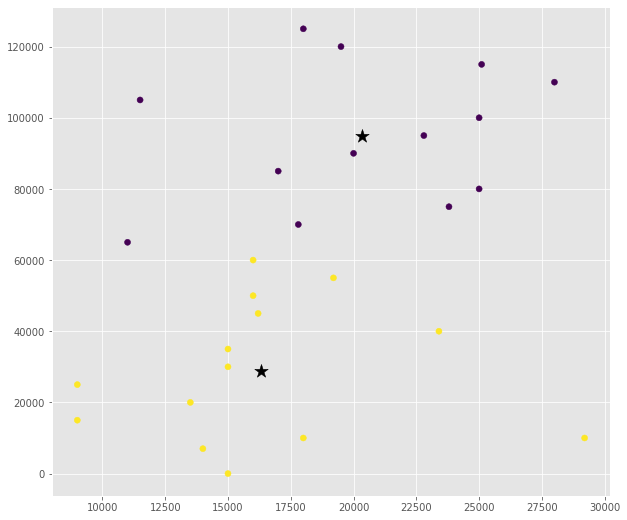

In [ ]:
fig , ax = plt.subplots()
ax.scatter(Y[:,0],Y[:,1],c=y)
ax.scatter(C_[:,0],C_[:,1],marker='*',s=200,c='k')


In [ ]:
Z = np.array(list(zip(f1,f3)))
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(Z)
y=kmeans.predict(Z)
C_ = kmeans.cluster_centers_
C_

array([[  74285.71428571,   62642.85714286],
       [3386884.61538462,   58461.53846154]])

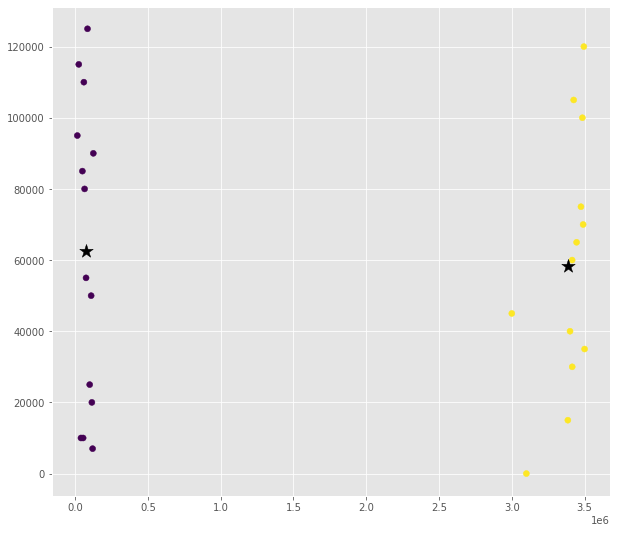

In [ ]:
fig , ax = plt.subplots()
ax.scatter(Z[:,0],Z[:,1],c=y)
ax.scatter(C_[:,0],C_[:,1],marker='*',s=200,c='k')


Podemos ver que el resuklta es similar al primer caso , la sucursal que menos actividades tiene  presenta una dispercion en sus puntos , entonces podemos decir que la sucursal Suc_Birmingham es la que menos actividad tiene en comparacion a las demas